# Pymaceuticals Inc.
---

### Analysis

1. Efficacy of Capomulin and Ramicane: The box plot suggests that mice treated with Capomulin and Ramicane had lower overall and median tumor volumes compared to Infubinol and Ceftamin after treatment, indicating Capomulin and Ramicane might have greater efficacy in reducing tumor size.
2. Tumor Volume Over Time for Mouse l509 treated with Capomulin: The line plot shows that the tumor volume initially increases, peaking at around 20 days, then sharply declines until around 35 days. Although it went slightly upwards at the end, overall speaking, the tumor volume still decreased compared to the first day, indicating that Capomulin might have a delayed effect but can still reduce tumor levels over time.
3. Correlation Between Mice Weight and Average Tumor Volume: The scatter plot shows a positive correlation between mouse weight and average tumor volume, suggesting that on average, heavier mice tend to have greater tumor volumes.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
study_data_complete["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = study_data_complete[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_data = study_data_complete.loc[study_data_complete['Mouse ID'] == 'g989']
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data = study_data_complete.drop(duplicate_data.index)
clean_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_study_data["Mouse ID"].nunique()
clean_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor_volume = clean_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor_volume = clean_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_volume_var = clean_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_volume_sd = clean_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_volume_sem = clean_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
drug_regimen_summary = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": tumor_volume_var,
    "Tumor Volume Std. Dev.": tumor_volume_sd,
    "Tumor Volume Std. Err.": tumor_volume_sem
})
drug_regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

drug_regimen_agg_summary = (clean_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]
                            .agg(['mean', 'median', 'var', 'std', 'sem'])
                            .rename_axis(columns=['Tumor Volume (mm3)'])
                            .rename(columns=lambda x: x if x in ['mean', 'median', 'var', 'std', 'sem'] else x)
                            .set_axis(pd.MultiIndex.from_product([['Tumor Volume (mm3)'], ['mean', 'median', 'var', 'std', 'sem']]), axis=1)
                           )

drug_regimen_agg_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
# Group by "Drug Regimen" and count the number of rows for each drug regimen
drug_regimen_counts = clean_study_data["Drug Regimen"].value_counts()

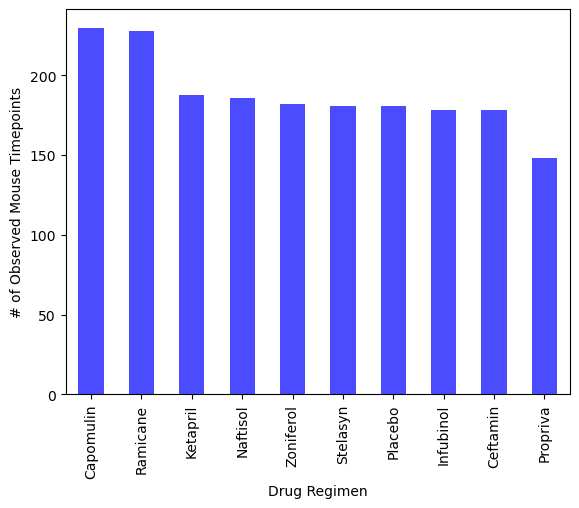

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints_bar = drug_regimen_counts.plot(kind="bar", color="blue", alpha=0.7, figsize=(6.5, 5), width=0.5)
timepoints_bar.set_xlabel("Drug Regimen")
timepoints_bar.set_ylabel("# of Observed Mouse Timepoints")
timepoints_bar.set_xticklabels(drug_regimen_counts.index, rotation=90)
plt.show()

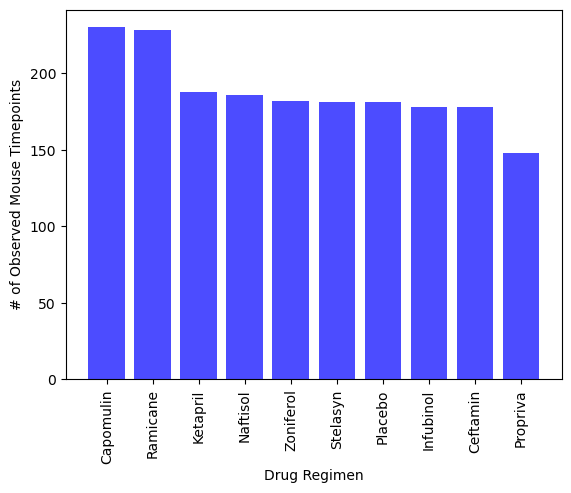

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color="blue", alpha=0.7, align="center")
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

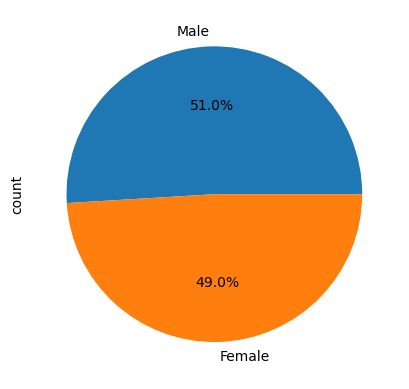

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_pie = clean_study_data["Sex"].value_counts()

# Make the pie chart
gender_pie.plot.pie(autopct='%1.1f%%')
plt.show()

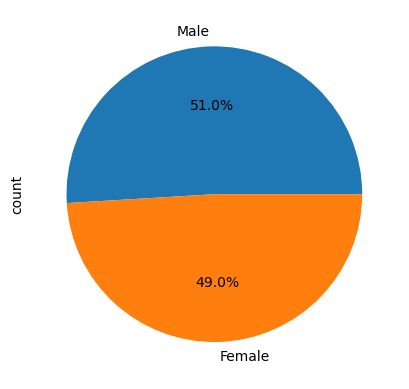

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sex_counts = clean_study_data["Sex"].value_counts()

# Make the pie chart
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.ylabel("count")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = clean_study_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_df = pd.merge(greatest_timepoint_df, clean_study_data, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = final_tumor_df[final_tumor_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']

    # add subset
    tumor_vol_data.append(drug_data)

    # Determine outliers using upper and lower bounds
    quartiles = drug_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]

    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


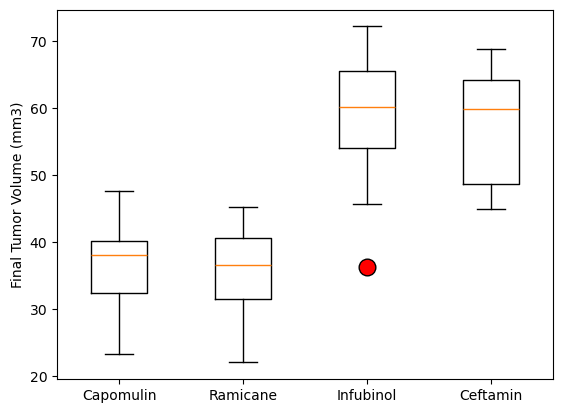

In [16]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments, flierprops={'markerfacecolor': 'red', 'marker': 'o', 'markersize': '12', 'linestyle': 'none'})
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

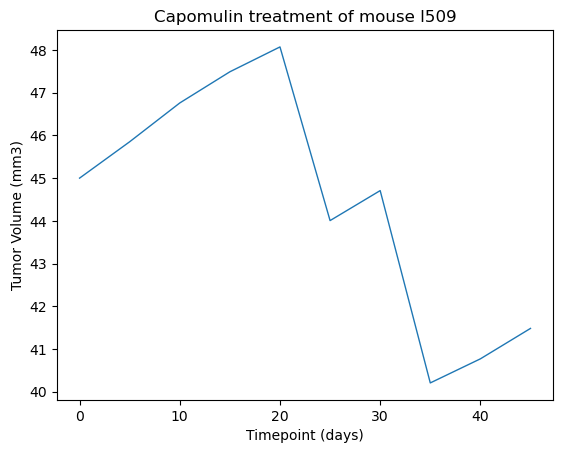

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the data for Capomulin
capomulin_data = clean_study_data[clean_study_data['Drug Regimen'] == 'Capomulin']

# Select the specific mouse treated with Capomulin (mouse 'l509')
mouse_l509 = capomulin_data[capomulin_data['Mouse ID'] == 'l509']

# Plot tumor volume vs timepoint for the mouse
plt.plot(mouse_l509['Timepoint'], mouse_l509['Tumor Volume (mm3)'], linewidth=1)

# Add labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')

# Display the plot
plt.show()

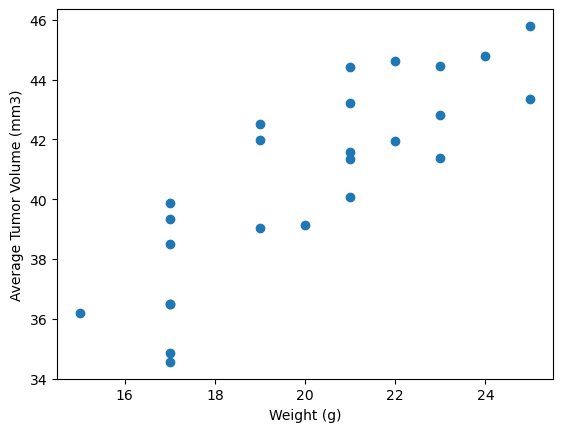

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding ßmouse weight
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Generate a scatter plot of mouse weight vs. average tumor volume
plt.scatter(mouse_weight, avg_tumor_volume)

# Add labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


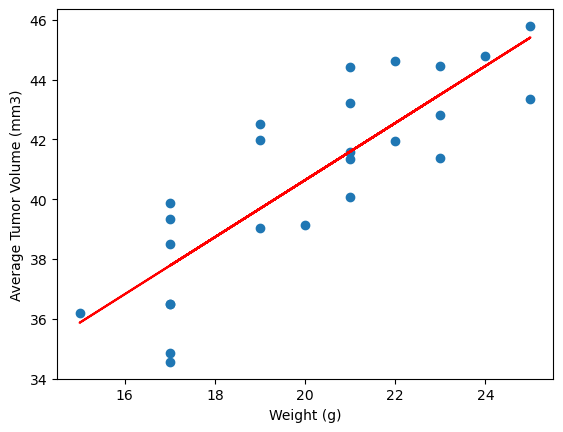

In [19]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr_coefficient = st.pearsonr(mouse_weight, avg_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {corr_coefficient[0]:.2f}")

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_volume)

# Generate values for the regression line
regress_values = mouse_weight * slope + intercept

# Plot the scatter plot and the linear regression line
plt.scatter(mouse_weight, avg_tumor_volume)
plt.plot(mouse_weight, regress_values, color="red")

# Add labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()
